In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline 

1. Load the data


In [3]:
df_train = pd.read_csv('C:/Users/Lenovo/Desktop/refined_projects/House-Price-Predictor/data/train.csv')


2. Basic Info

In [4]:
df_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,9800,4,2,2,yes,yes,no,no,no,2,no,semi-furnished,5250000
1,6540,4,2,2,yes,yes,yes,no,yes,2,yes,furnished,8540000
2,3520,2,1,2,yes,no,no,no,no,0,yes,furnished,4515000
3,8250,3,1,1,yes,no,no,no,no,0,no,furnished,4480000
4,3180,4,1,2,yes,no,yes,no,yes,0,no,unfurnished,3290000


In [5]:
df_train.describe()

,area,bedrooms,bathrooms,stories,parking,price
count,381.000000,381.000000,381.000000,381.000000,381.000000,3.810000e+02
mean,5064.372703,2.984252,1.301837,1.821522,0.650919,4.801825e+06
std,2044.695057,0.750273,0.503380,0.873383,0.834412,1.935458e+06
min,1700.000000,1.000000,1.000000,1.000000,0.000000,1.750000e+06
25%,3600.000000,3.000000,1.000000,1.000000,0.000000,3.395000e+06
50%,4500.000000,3.000000,1.000000,2.000000,0.000000,4.375000e+06
75%,6240.000000,3.000000,2.000000,2.000000,1.000000,5.880000e+06
max,15600.000000,6.000000,3.000000,4.000000,3.000000,1.330000e+07


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   area              381 non-null    int64 
 1   bedrooms          381 non-null    int64 
 2   bathrooms         381 non-null    int64 
 3   stories           381 non-null    int64 
 4   mainroad          381 non-null    object
 5   guestroom         381 non-null    object
 6   basement          381 non-null    object
 7   hotwaterheating   381 non-null    object
 8   airconditioning   381 non-null    object
 9   parking           381 non-null    int64 
 10  prefarea          381 non-null    object
 11  furnishingstatus  381 non-null    object
 12  price             381 non-null    int64 
dtypes: int64(6), object(7)
memory usage: 38.8+ KB


After basic analysis, we come to know following findings:
1. There are 381 rows and 13 cols with 12 features and 1 target
2. There is no null values in any features
3. There are 7 categorical features with 6 nominal features(mainroad, guestroom, basement, hotwaterheating, airconditioning, prefarea) all yes/no and 1 ordinal featue(furnishingstatus)
3.1) binary encoding is most efficient and simple for YES/NO categorical features
3.2) Ordinal encoding for ordinal feature

3. Target Variable Analysis 

In [7]:
df_train["price"].describe()

count    3.810000e+02
mean     4.801825e+06
std      1.935458e+06
min      1.750000e+06
25%      3.395000e+06
50%      4.375000e+06
75%      5.880000e+06
max      1.330000e+07
Name: price, dtype: float64

In [8]:
print(df_train["price"].skew())

1.157101105608128


Since skew>1: Highly right-skewed(needs transformation(log transformation most effecitve))

For Tree Based model no transformation neeeded Trees handle skewness well.

Text(0.5, 1.0, 'Distribution of price')

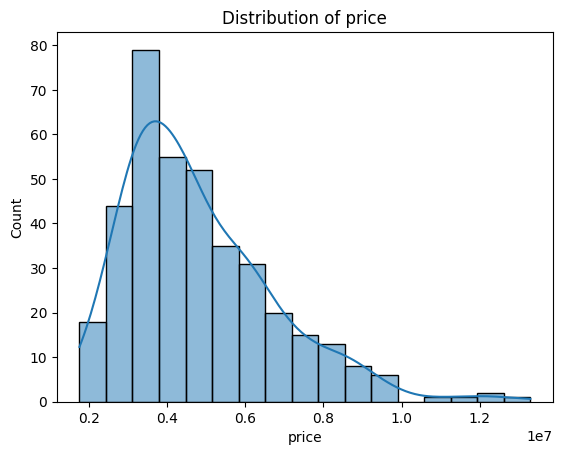

In [9]:
sns.histplot(df_train['price'], kde = True)
plt.title("Distribution of price")

<Axes: ylabel='price'>

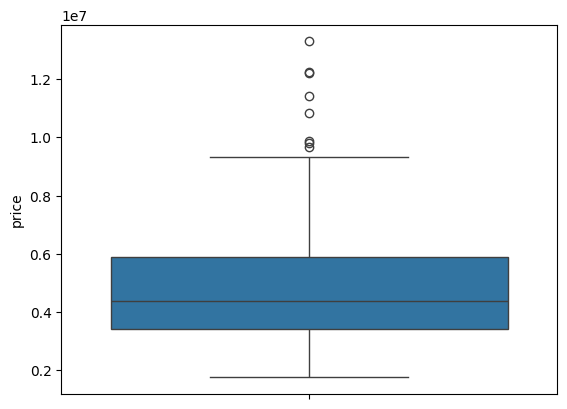

In [10]:
sns.boxplot(df_train['price'])

4. Univariate Analysis

array([[<Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'stories'}>],
       [<Axes: title={'center': 'parking'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

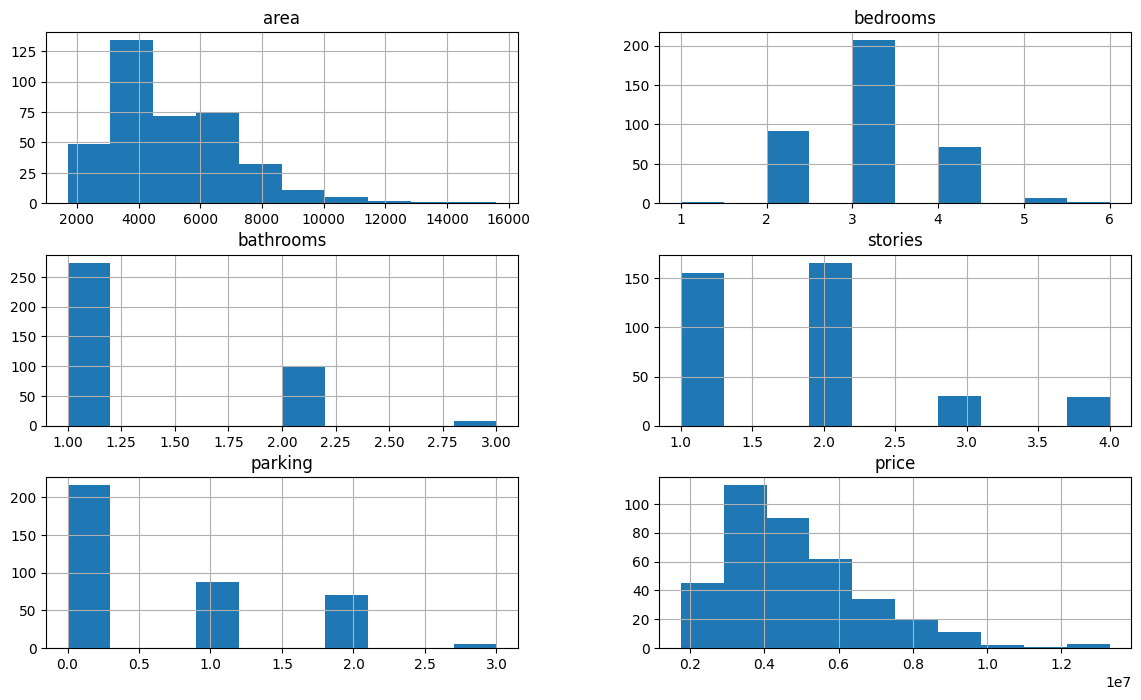

In [11]:
df_train.select_dtypes(include='number').hist(figsize=(14, 8))


<Axes: xlabel='mainroad', ylabel='count'>

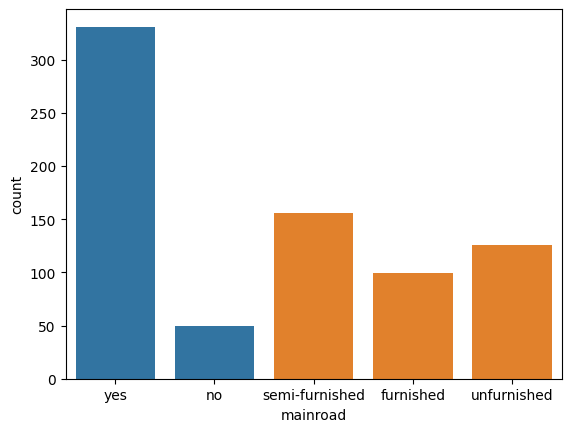

In [12]:
sns.countplot(x='mainroad', data=df_train)
sns.countplot(x='furnishingstatus', data=df_train)




<Axes: xlabel='hotwaterheating', ylabel='count'>

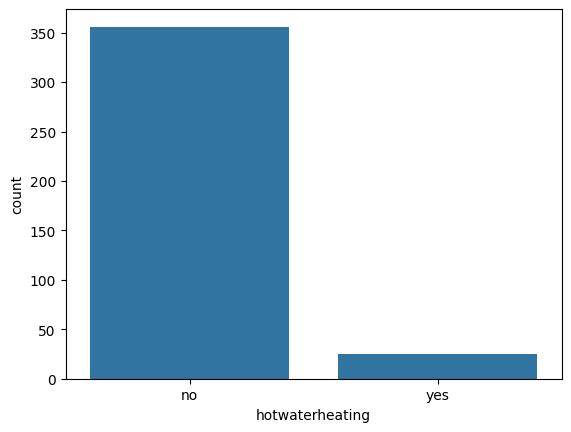

In [13]:
# sns.countplot(x='guestroom', data=df_train)
# sns.countplot(x='basement', data=df_train)
sns.countplot(x='hotwaterheating', data=df_train)



5. Bivariate Analysis


<Axes: >

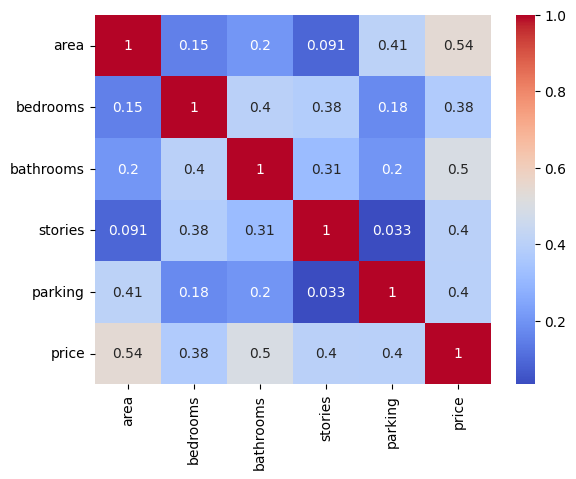

In [14]:
numerical_df = df_train.select_dtypes(include=['int64'])
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')


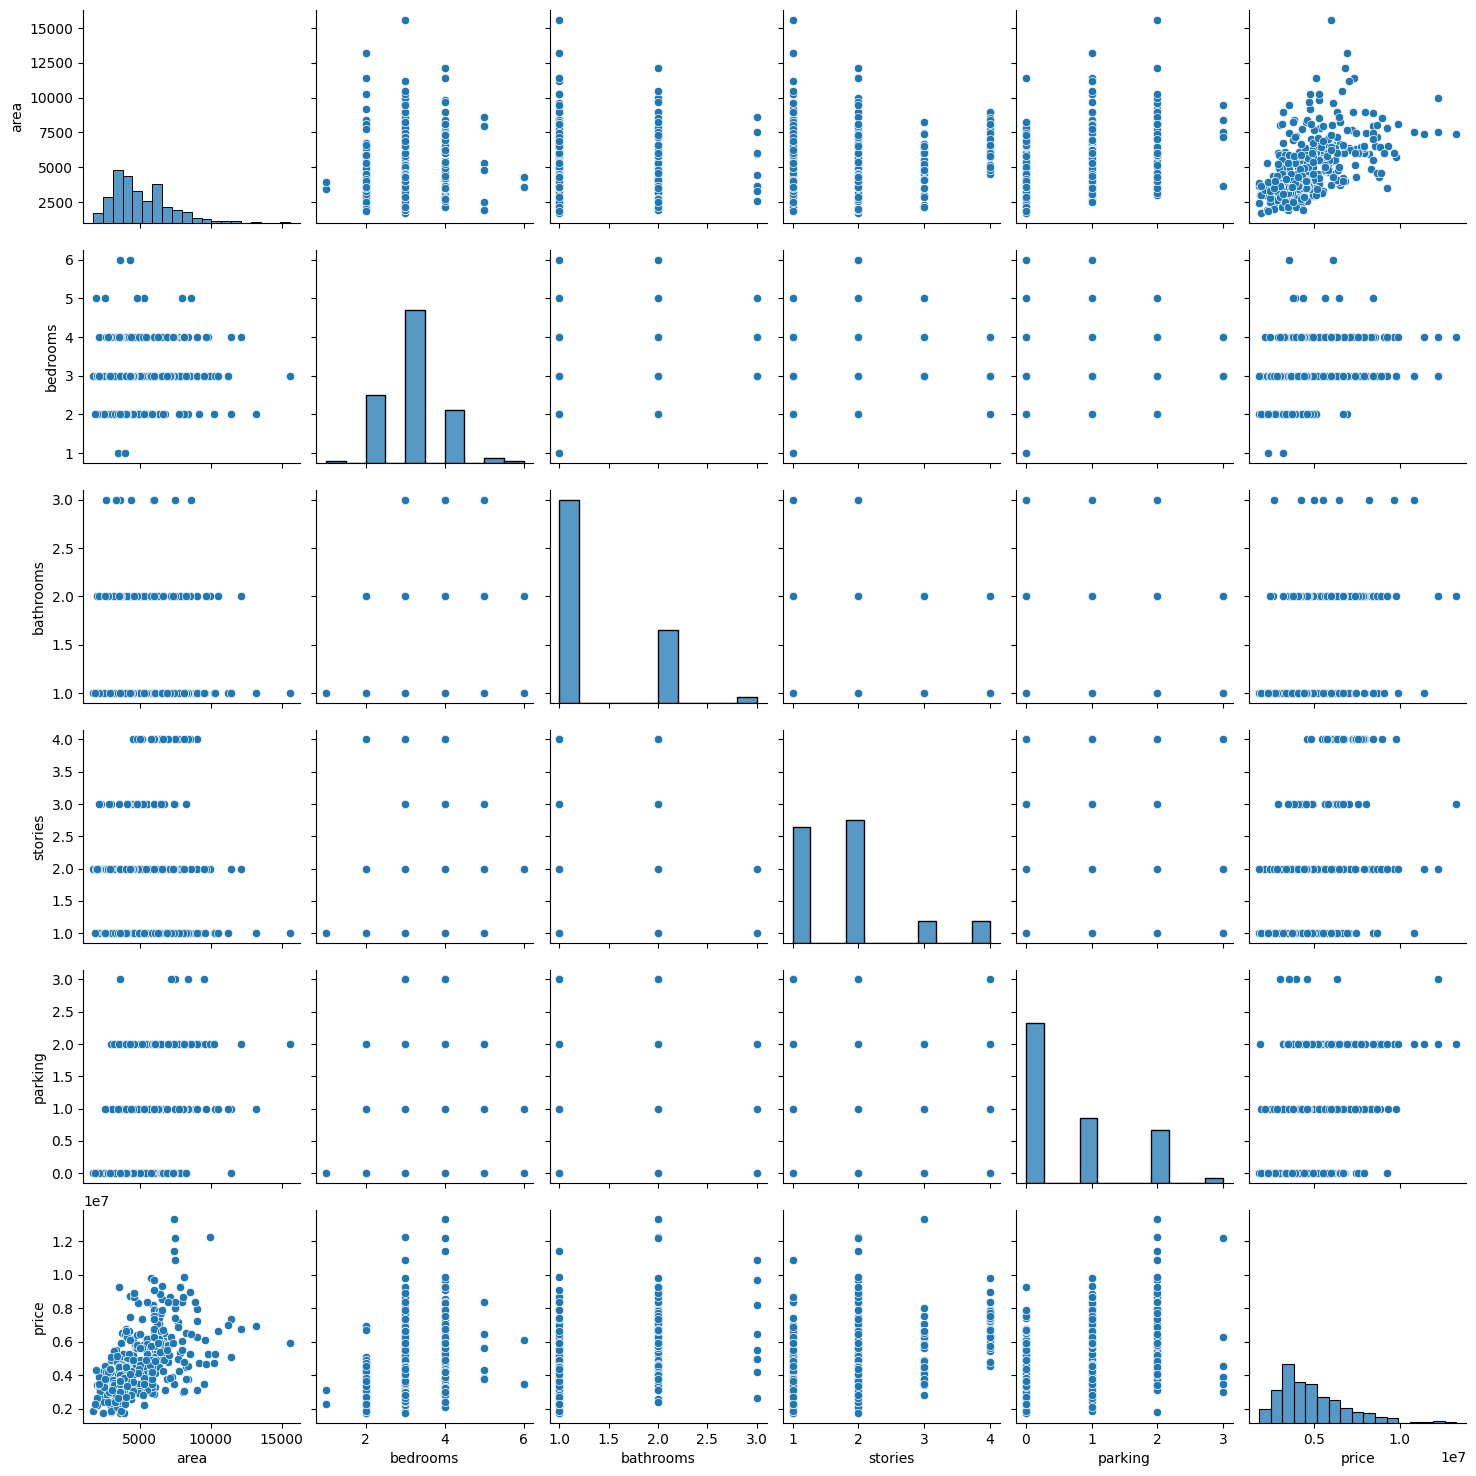

In [15]:
sns.pairplot(df_train)

In [30]:
num_features = [ feature for feature in df_train.columns if df_train[feature].dtype == 'int64']
print(num_features)

['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']


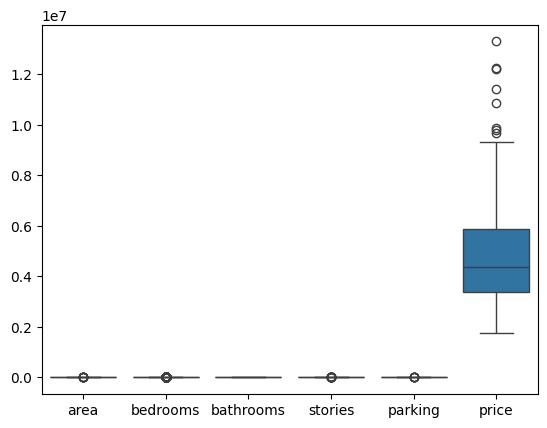

In [31]:
for feature in num_features:
    sns.boxplot(data=df_train[[feature]])

In [53]:
for feature in num_features:
    df_train['log_'+feature] = np.log1p(df_train[feature])
    

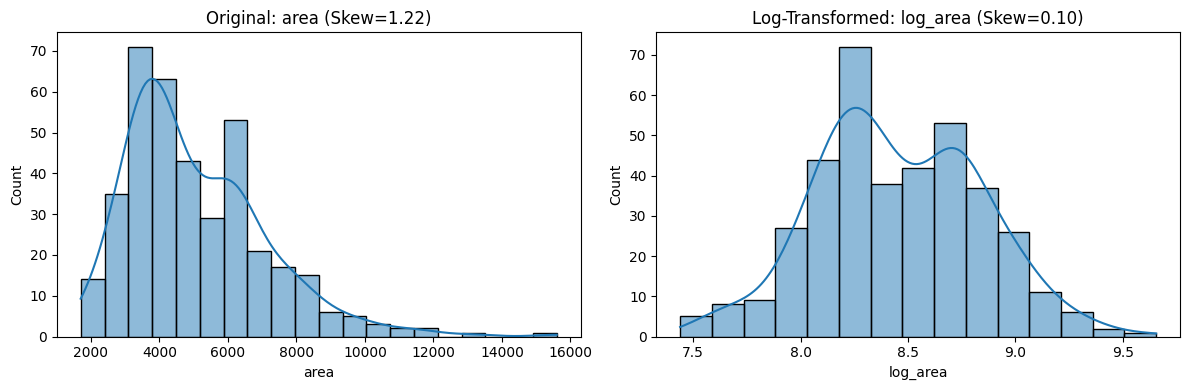

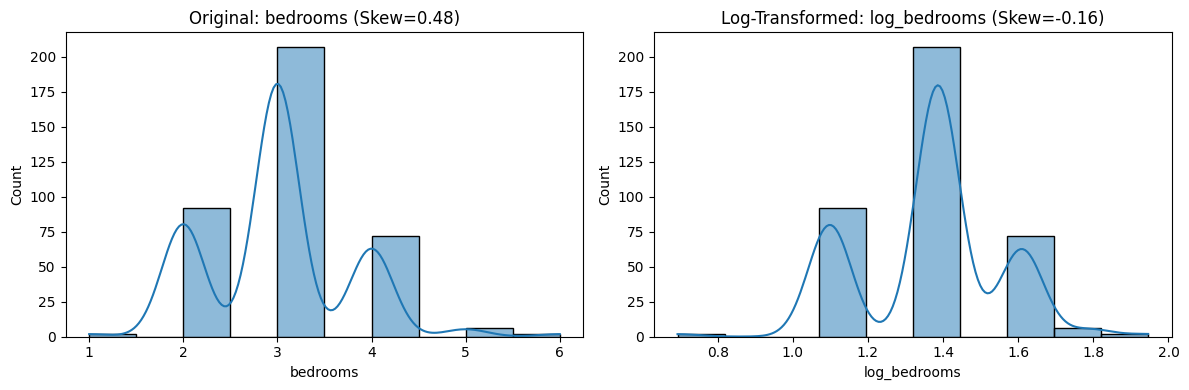

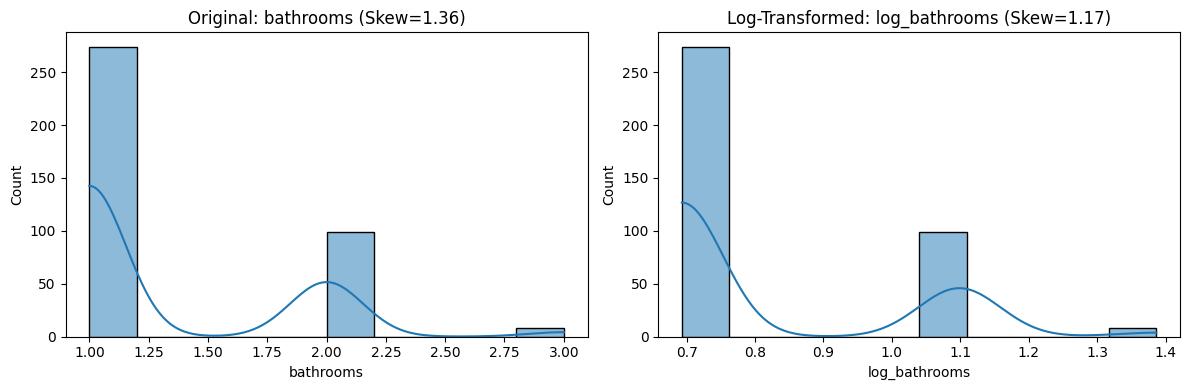

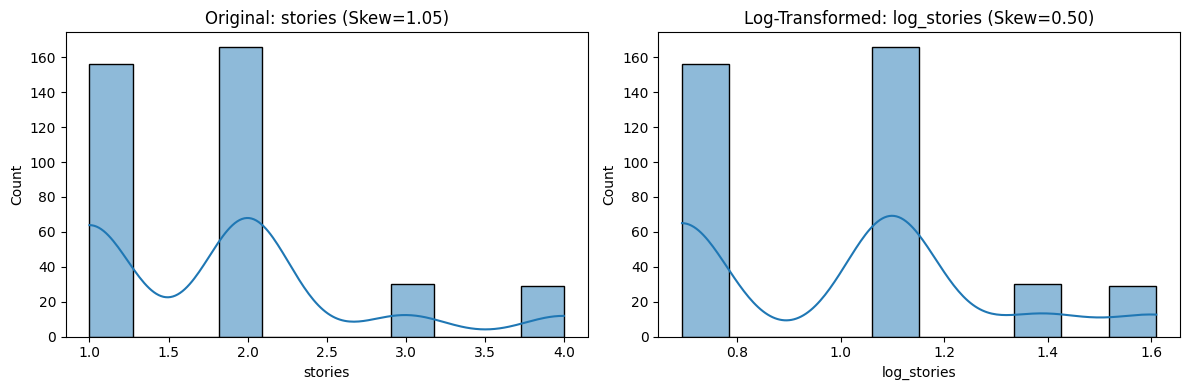

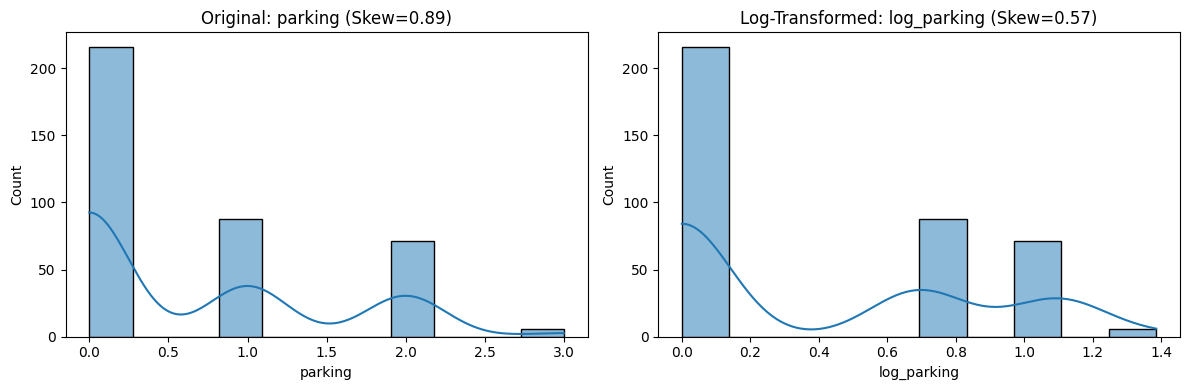

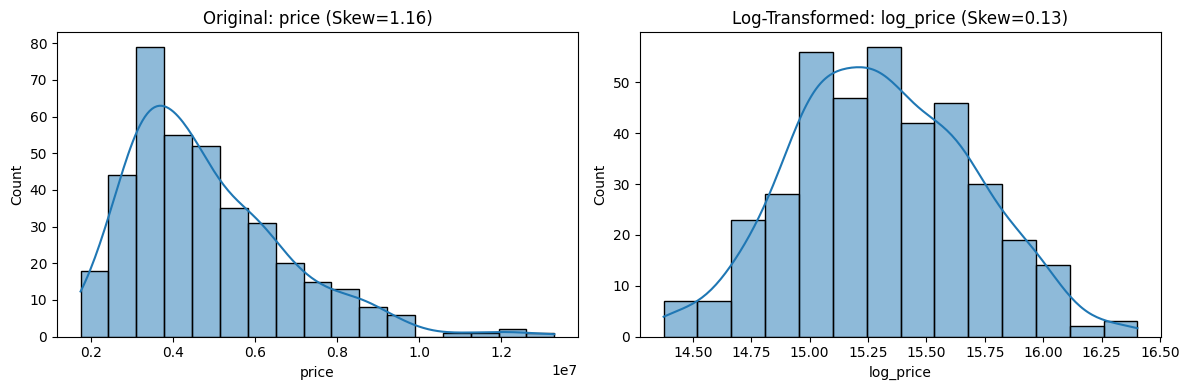

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in num_features:
    # Create a figure with two subplots side by side
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Plot original distribution (left)
    sns.histplot(df_train[col], kde=True, ax=axes[0])
    axes[0].set_title(f"Original: {col} (Skew={df_train[col].skew():.2f})")
    
    # Plot log-transformed distribution (right)
    log_col = 'log_' + col
    sns.histplot(df_train[log_col], kde=True, ax=axes[1])
    axes[1].set_title(f"Log-Transformed: {log_col} (Skew={df_train[log_col].skew():.2f})")
    
    plt.tight_layout()  # Prevent overlapping
    plt.show()

In [55]:
df_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price,log_area,log_bedrooms,log_bathrooms,log_stories,log_parking,log_price
0,9800,4,2,2,yes,yes,no,no,no,2,no,semi-furnished,5250000,9.190240,1.609438,1.098612,1.098612,1.098612,15.473739
1,6540,4,2,2,yes,yes,yes,no,yes,2,yes,furnished,8540000,8.785845,1.609438,1.098612,1.098612,1.098612,15.960272
2,3520,2,1,2,yes,no,no,no,no,0,yes,furnished,4515000,8.166500,1.098612,0.693147,1.098612,0.000000,15.322916
3,8250,3,1,1,yes,no,no,no,no,0,no,furnished,4480000,9.018090,1.386294,0.693147,0.693147,0.000000,15.315134
4,3180,4,1,2,yes,no,yes,no,yes,0,no,unfurnished,3290000,8.064951,1.609438,0.693147,1.098612,0.000000,15.006398


In [59]:
X = df_train[['log_area', 'log_bedrooms', 'log_bathrooms', 'log_stories', 'log_parking', 'log_price']]

In [60]:
X.head()

,log_area,log_bedrooms,log_bathrooms,log_stories,log_parking,log_price
0,9.190240,1.609438,1.098612,1.098612,1.098612,15.473739
1,8.785845,1.609438,1.098612,1.098612,1.098612,15.960272
2,8.166500,1.098612,0.693147,1.098612,0.000000,15.322916
3,9.018090,1.386294,0.693147,0.693147,0.000000,15.315134
4,8.064951,1.609438,0.693147,1.098612,0.000000,15.006398


<Axes: >

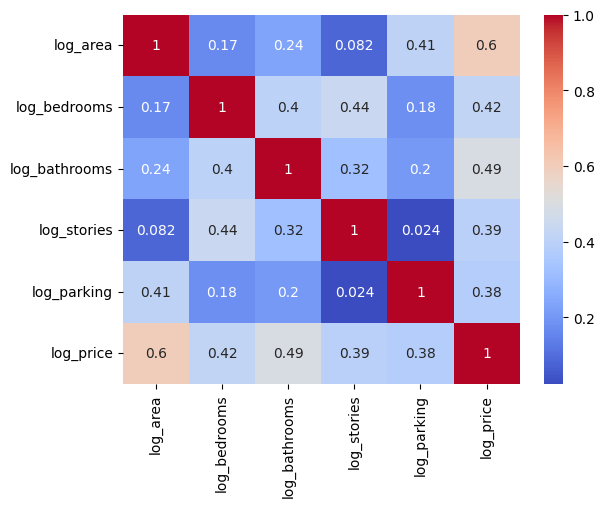

In [62]:


sns.heatmap(X.corr(), annot=True, cmap='coolwarm')




After applying log transformation to all numerical features it is seen that area and bedrooms has improved correlation but bathrooms, stories and parkings have reduced correlation. 
So we can apply log transformation to area, bedrooms and price only.